In [2]:
from datetime import datetime, timedelta

import numpy as np

infile = '../climate data/larger_area/pressure_data.npz'

data = np.load(infile)
latv = data['latv']
lonv = data['lonv']
confining_pressure = data['confining_pressure']
snow_pressure = data['snow_pressure']
pore_pressure = data['pore_pressure']
depths = data['depths']
water_influx = data['water_influx']
snow_depth = data['snow_depth']

years = np.arange(1993, 2024)
t = np.array(
        [datetime(int(years[0]), 1, 1) + i*timedelta(days=1) for i in range(
            snow_pressure.shape[0])])

In [11]:
print(pore_pressure.shape)

(15, 11257, 5, 5)


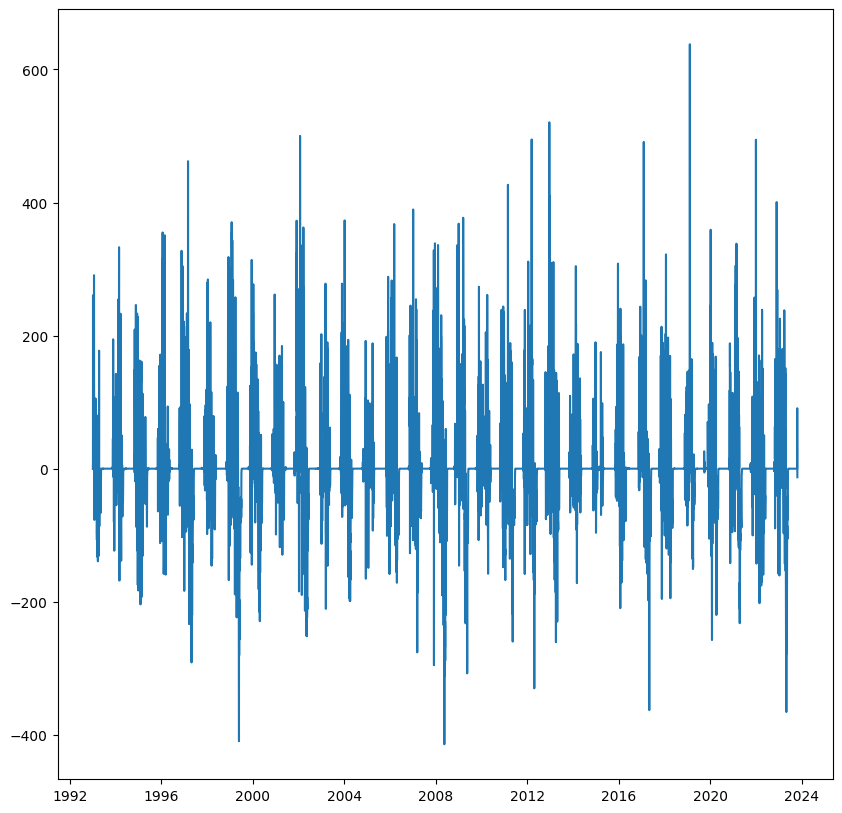

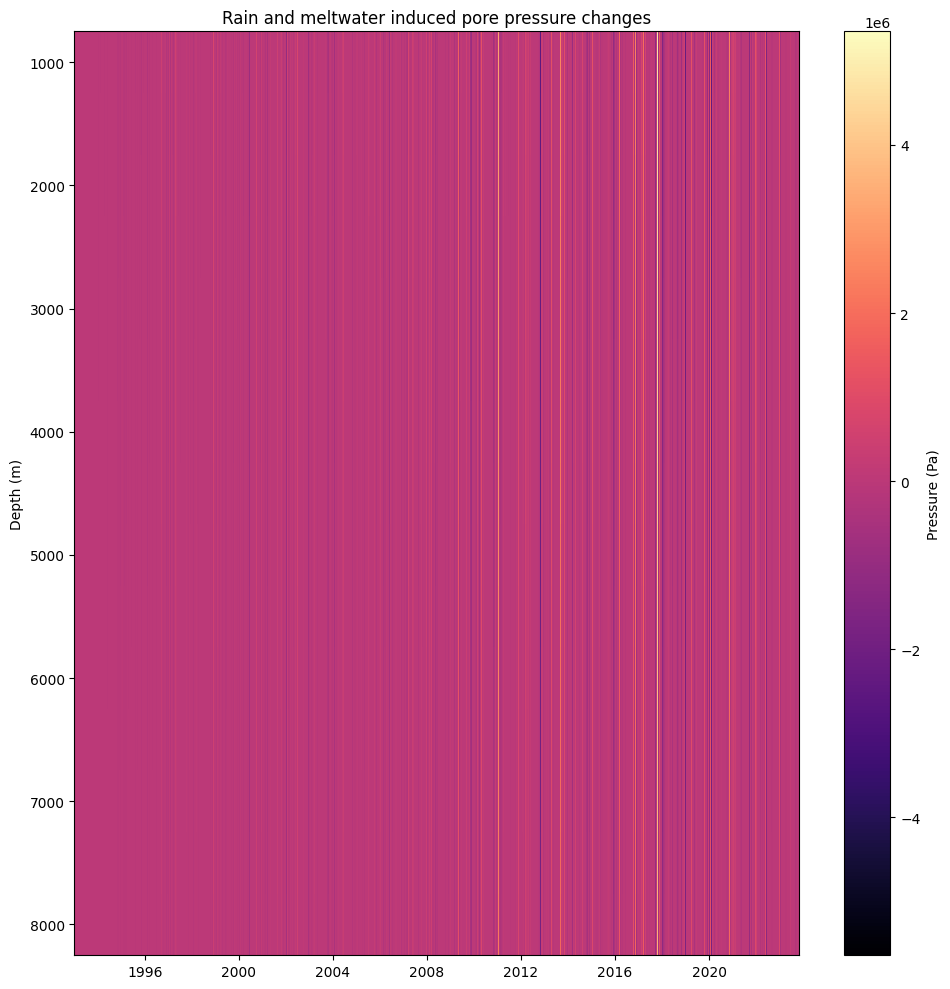

In [18]:
from matplotlib import pyplot as plt
import matplotlib as mpl

plt.figure(figsize=(10,10))
plt.plot(t, snow_pressure[:, 1, 1])
plt.figure(figsize=(10,10))
plt.pcolormesh(t, depths, pore_pressure[:, :, 1, 1], cmap="magma")
cb = plt.colorbar()
cb.set_label("Pressure (Pa)")
plt.gca().invert_yaxis()
plt.title("Rain and meltwater induced pore pressure changes")
plt.ylabel("Depth (m)")
plt.gca().xaxis.set_major_locator(mpl.dates.AutoDateLocator())
plt.tight_layout()